# Final Project - Data Set 1
Sonam Okuda

In [1]:
# Importing and initializing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit

# Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler  # For normalization

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
# Importing and loading dataset into original dataframe, df
df = pd.read_excel("C:\\Users\\user\\Downloads\\Dataset_I\\aviation_events.xlsx")

<h1 style="font-size:30px;">Preliminary Data Exploration</h1>

<h2 style="font-size:25px;">Selecting Data</h2>

For the data exploration part of this project, I selected factors from the dataset that I thought could influence each other. I then separated them into numerical/quantitative and observatory/qualitative data frames, as exploring qualitative and quantitative data at the same time would be difficult. 

The factors I decided to highlight are:
    <ul>
    <li>ev_id : ID of the event</li>
    <li>ev_ type : accident, incident, etc.</li>
    <li>ev_dow : day of event</li>
    <li>ev_time : time of event</li>
    <li>ev_year : year of event </li>
    <li>ev_nr_apt_loc : on or off airstrip</li>
    <li>apt dist/elevation : distance from and elevation of airport</li>
    <li>light cond : daytime/nighttime</li>
    <li>sky_cond : general weather</li>
    <li>wx_temp : temperature</li>
    <li>wx_dew_pt : dew point</li>
    <li>wind_vel_kts : windspeed</li>
    <li>gust_ind : gust indicator</li>
    <li>altimeter : altitude of event</li>
    <li>ev_highest_injury : most severe injury</li>
    <li>inj_tot_t : total number of injuries</li>
    </ul>


In [3]:
# Selecting Columns of Interest from Dataset
sub_df1= df.loc[:, ["ev_id", "ev_type", "ev_dow", "ev_time", "ev_year", "ev_nr_apt_loc", "apt_dist", "apt_elev", "light_cond", "sky_cond_nonceil", 
                    "wx_temp", "wx_dew_pt", "wind_vel_kts", "gust_ind", "altimeter", "ev_highest_injury", "inj_tot_t"]]

<h2 style="font-size:25px;">Exploring Data</h2>
<h3 style="font-size:20px;">Qualitative Data</h3>

<b>Exploring factors contributing to number of events</b>

I wanted to see if different conditions increased the likelihood for an event to occur. I compared number of unique incidents to other factors, such as year, time, light conditions, and day. Results were plotted in a barchart.

Most events happens on bright, clear days; I can assume that it is not a causal relationship, but rather a result of how the data was collected. Moreover, most accidents happen on Saturdays, which is probably due to the total number of active flights being high. Since we do not have access to the total number of active flights as a part of this dataset, it is difficult to ascertain whether there is an actual relationship between factors. For this dataset, large peaks such as the sunny, clear and Saturday peak, are unhelpful since they are present in the general distribution of data. The "type" graph was to display the distribution of event types, but is not really indicative of anything else.

<b>Exploring factors contributing to injuries</b>

I also wanted to see if there were any correlations between number of injured people and weather conditions. I selected rows of the dataframe where there was some sort of injury (ie. everything except "NONE") before grouping by different qualitative factors to see if there were any correlations. I then made barcharts of my findings. 

From the charts, the only reasonable correlation is that most injurious events happen after the plane has taken off. The apparent correlation of injurious events happening during clear, well-lit conditions is counter-intuitive, and this is supported by the other barcharts because, in general, events tend to happen in these conditions, so the increase in injuries is a result of how the events are distributed, and not because clear, well-lit days are particularly harmful.

<h3 style="font-size:20px;">Quantitative Data</h3>
<b>Seaborn Pairplot</b>

To see if any other factors had relationships, I put the quantitative qualities in a pairplot. Most of them had atleast a vague positive correlation, but there were a significant amount of severe outliers. From the pairplot, a lot of the quantities are severely concentrated in one area of the plot, with only one or two outliers severely skewing the data. I will double check that thest data points are valid and correct. 

Text(0.5, 1.0, 'Types of Events')

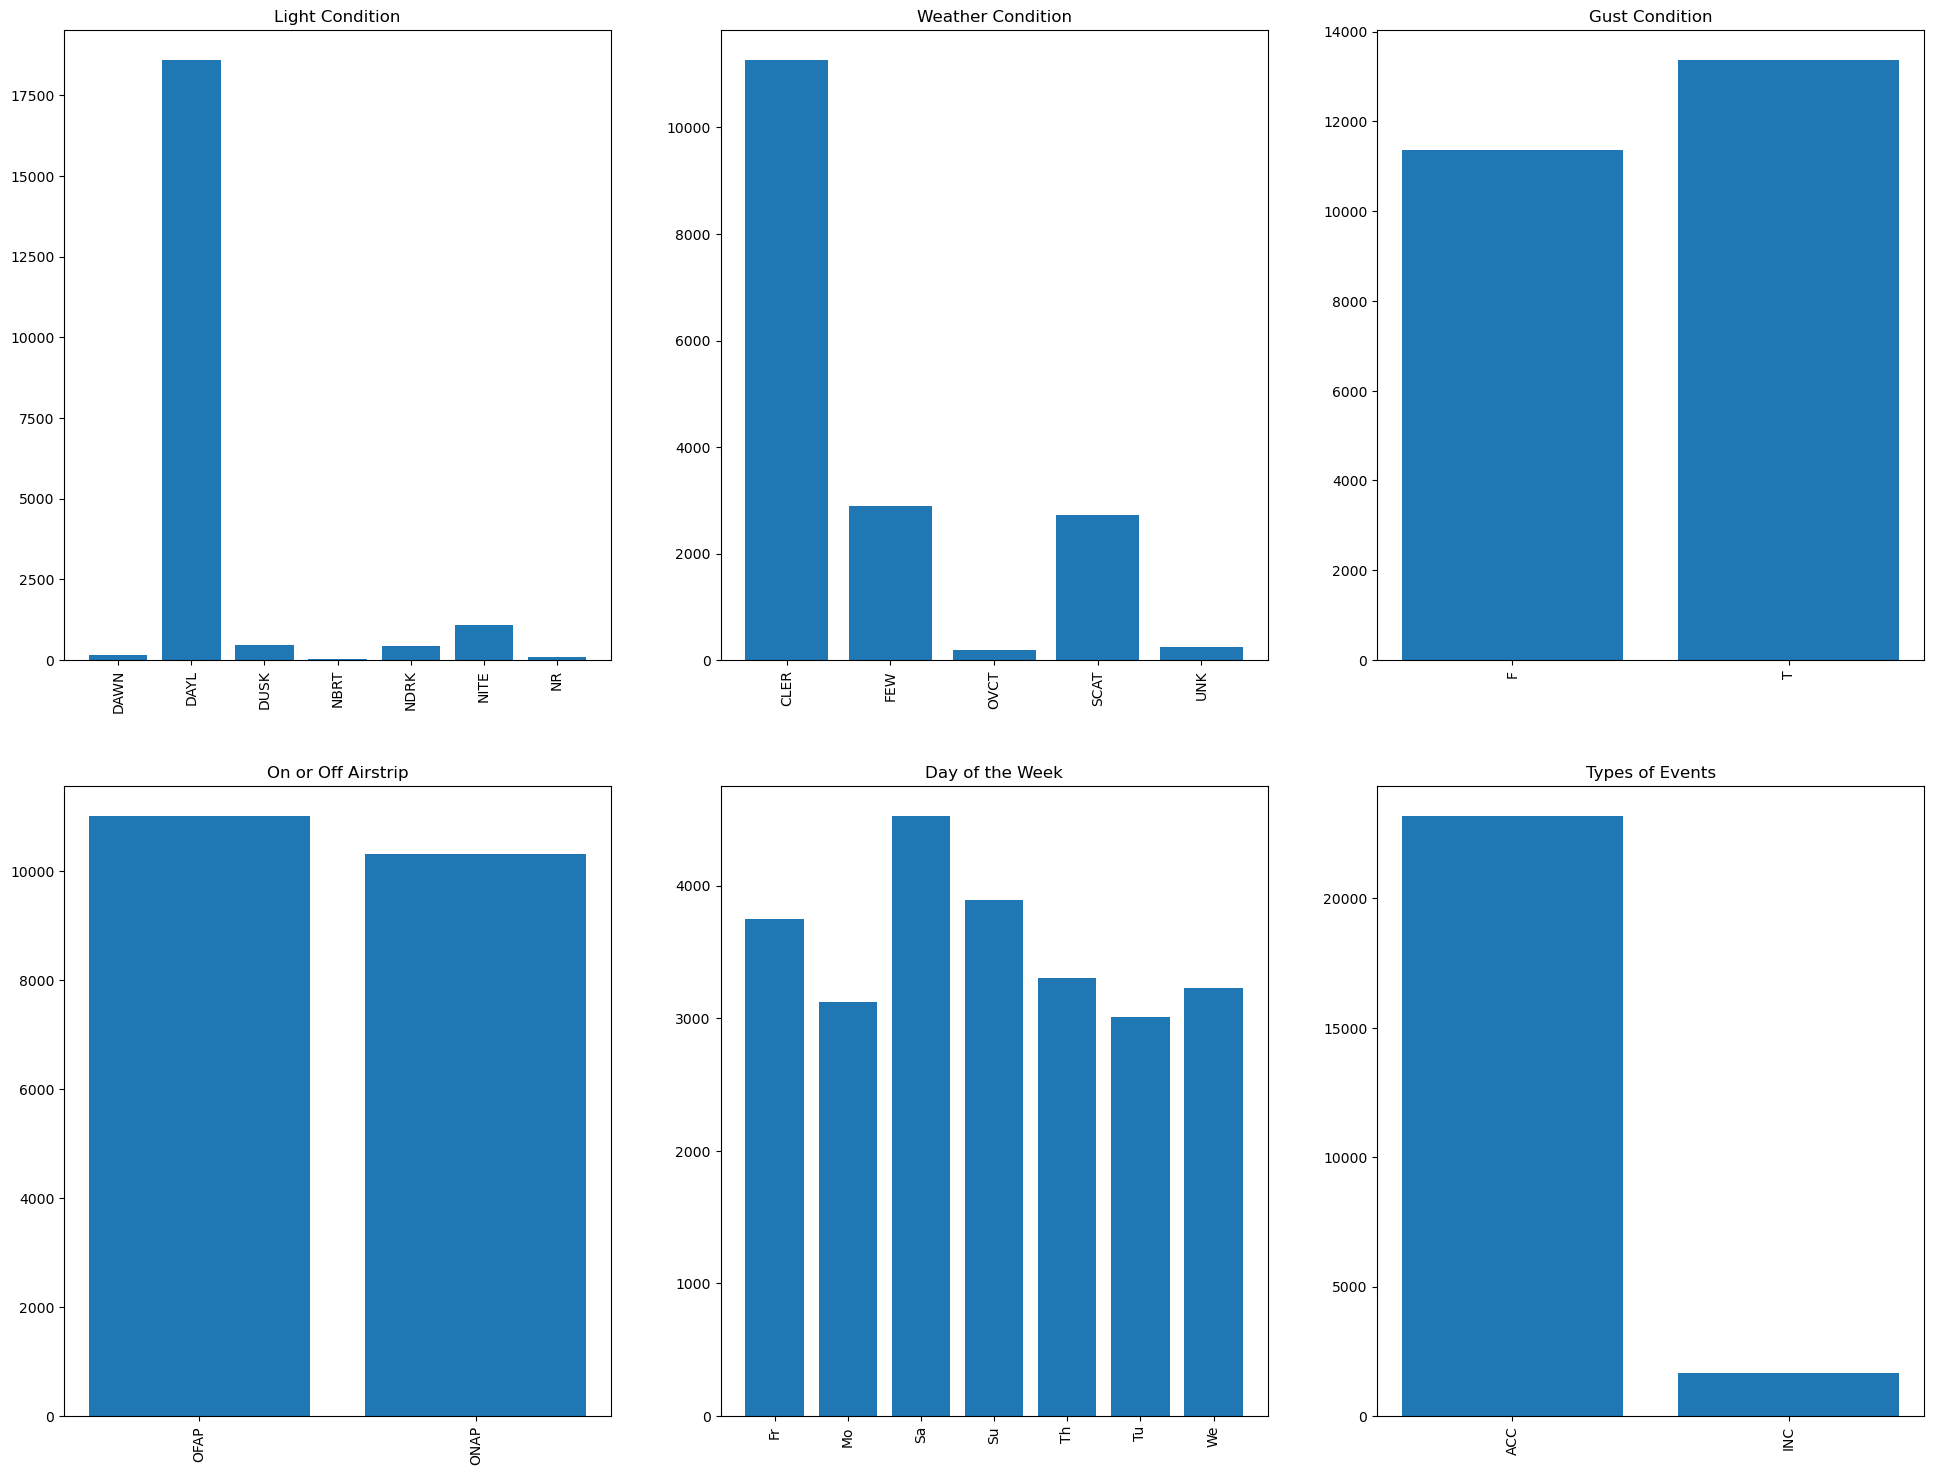

In [4]:
# Setting the dataframes for event frequency
num_lc = sub_df1.groupby("light_cond", as_index=False).nunique()
num_sky = sub_df1.groupby("sky_cond_nonceil", as_index=False).nunique()
num_gusty = sub_df1.groupby("gust_ind", as_index=False).nunique()
num_onf = sub_df1.groupby("ev_nr_apt_loc", as_index=False).nunique()
num_dow = sub_df1.groupby("ev_dow", as_index=False).nunique()
num_type = sub_df1.groupby("ev_type", as_index=False).nunique()

# Plotting barcharts for qualitatives
fig_num = plt.figure(figsize = (24,18))

fig_num.add_subplot(2, 3, 1)
plt.bar(num_lc["light_cond"], num_lc["ev_id"])
plt.xticks(num_lc["light_cond"], rotation='vertical')
plt.title("Light Condition")

fig_num.add_subplot(2, 3, 2)
plt.bar(num_sky["sky_cond_nonceil"], num_sky["ev_id"])
plt.xticks(num_sky["sky_cond_nonceil"], rotation='vertical')
plt.title("Weather Condition")

fig_num.add_subplot(2, 3, 3)
plt.bar(num_gusty["gust_ind"], num_gusty["ev_id"])
plt.xticks(num_gusty["gust_ind"], rotation='vertical')
plt.title("Gust Condition")

fig_num.add_subplot(2, 3, 4)
plt.bar(num_onf["ev_nr_apt_loc"], num_onf["ev_id"])
plt.xticks(num_onf["ev_nr_apt_loc"], rotation='vertical')
plt.title("On or Off Airstrip")

fig_num.add_subplot(2, 3, 5)
plt.bar(num_dow["ev_dow"], num_dow["ev_id"])
plt.xticks(num_dow["ev_dow"], rotation='vertical')
plt.title("Day of the Week")

fig_num.add_subplot(2, 3, 6)
plt.bar(num_type["ev_type"], num_type["ev_id"])
plt.xticks(num_type["ev_type"], rotation='vertical')
plt.title("Types of Events")



Text(0.5, 1.0, 'On or Off Airstrip')

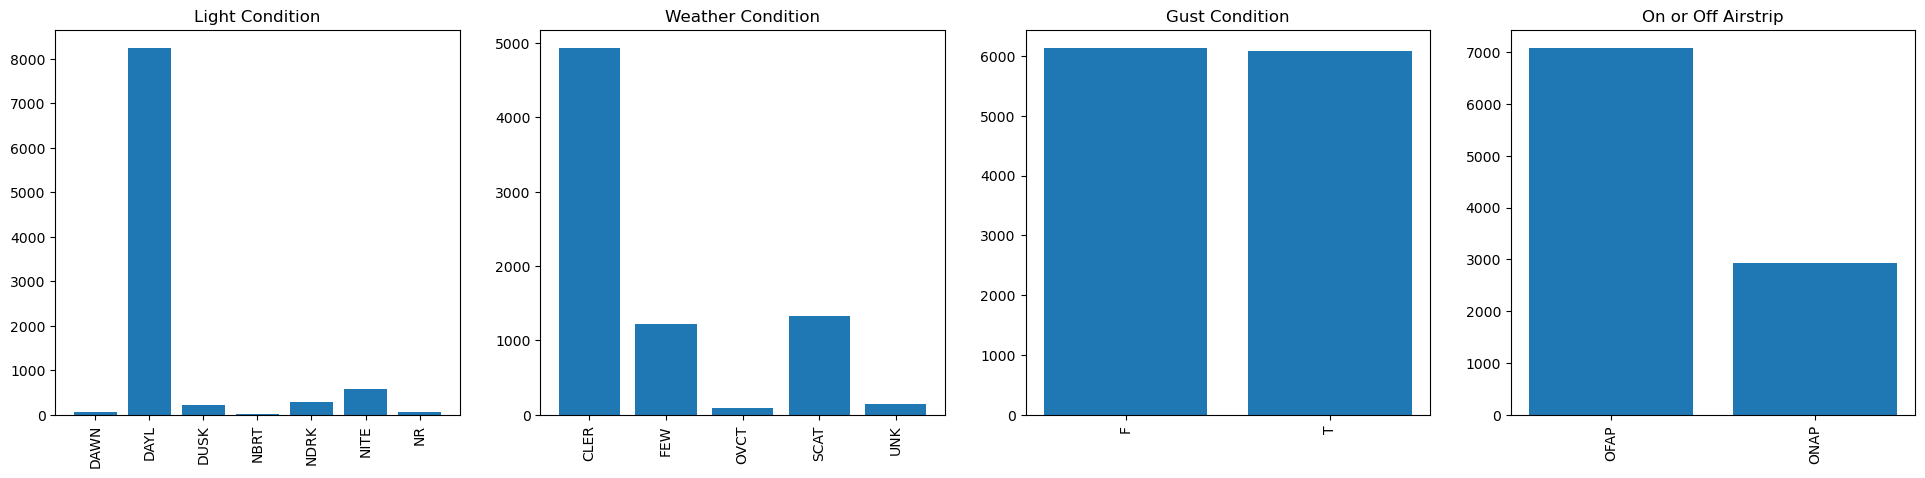

In [5]:
# Setting the dataframes for injury
injurious_df = sub_df1[sub_df1["ev_highest_injury"] != 'NONE']
inj_lc = injurious_df.groupby("light_cond", as_index=False).nunique()
inj_sky = injurious_df.groupby("sky_cond_nonceil", as_index=False).nunique()
inj_gusty = injurious_df.groupby("gust_ind", as_index=False).nunique()
inj_onf = injurious_df.groupby("ev_nr_apt_loc", as_index=False).nunique()
# Plotting injury related data
fig_inj = plt.figure(figsize = (24,5))

fig_inj.add_subplot(1, 4, 1)
plt.bar(inj_lc["light_cond"], inj_lc["ev_id"])
plt.xticks(inj_lc["light_cond"], rotation='vertical')
plt.title("Light Condition")

fig_inj.add_subplot(1, 4, 2)
plt.bar(inj_sky["sky_cond_nonceil"], inj_sky["ev_id"])
plt.xticks(inj_sky["sky_cond_nonceil"], rotation='vertical')
plt.title("Weather Condition")

fig_inj.add_subplot(1, 4, 3)
plt.bar(inj_gusty["gust_ind"], inj_gusty["ev_id"])
plt.xticks(inj_gusty["gust_ind"], rotation='vertical')
plt.title("Gust Condition")

fig_inj.add_subplot(1, 4, 4)
plt.bar(inj_onf["ev_nr_apt_loc"], inj_onf["ev_id"])
plt.xticks(inj_onf["ev_nr_apt_loc"], rotation='vertical')
plt.title("On or Off Airstrip")

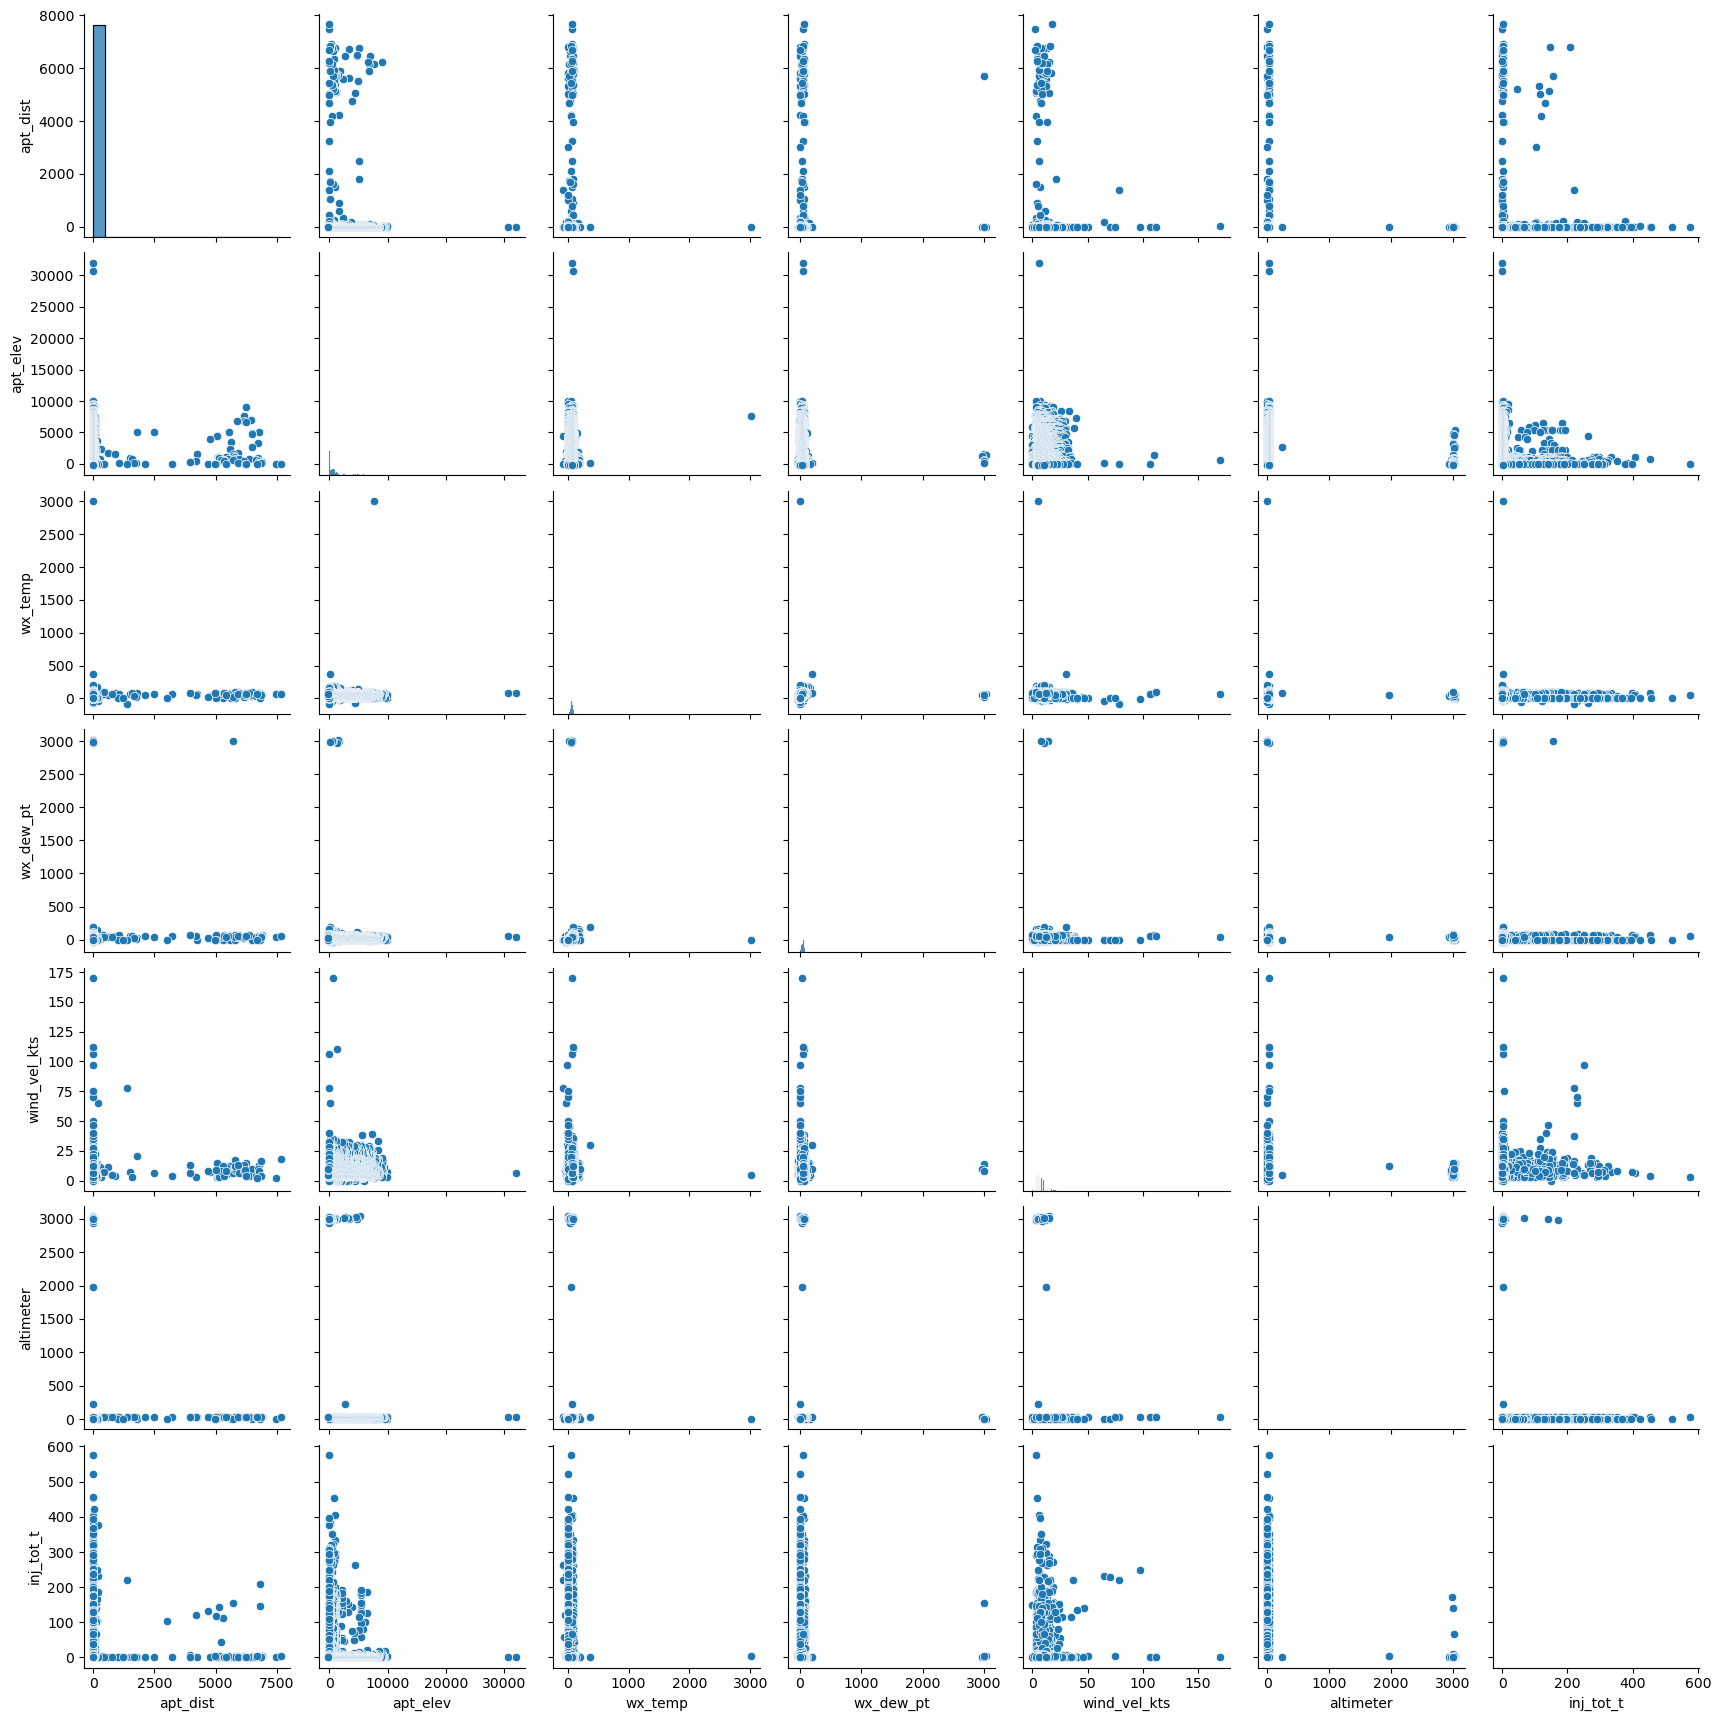

In [6]:
# Seaborn pairplot
pair_df = sub_df1.loc[:, ['apt_dist', 'apt_elev', 'wx_temp', 'wx_dew_pt', 'wind_vel_kts', 'altimeter', 'inj_tot_t']]
sns.pairplot(pair_df)

In [7]:
# Observing aspects of the data
print("Average y-value: ", sub_df1["inj_tot_t"].mean())
print("Standard Deviation: ", sub_df1["inj_tot_t"].std())

Average y-value:  7.477429900666415
Standard Deviation:  31.600972322960015


<h1 style="font-size:30px;">Selecting Relevant Factors</h1>

I want to predict how dangerous an event is. From the bar charts and pairplots, the factors that I will focus on are <i>apt_elev</i>, <i>wx_temp</i>, <i>wx_dew_pt</i>. There are a few outliers, but I will manually assess the data. For example, a wx_temp of 2000 is highly unlikely and will need to be removed. I will use a regression model to try and predict total number of injured persons. I will first try linear and polynomial regression, as well as fitting a curve to given non-linear functions, with one variable. I will then try lasso and ridge regression models.

It must be noted that any model developed will have a very high error due to the dsitribution of the data, as seen in the block above. The mean is around four injuries per event, but has a standard deviation of 19, meaning the error is likely to be higher than 100%.

In [8]:
# Examining outliers
sub_df1 = sub_df1.sort_values(by="apt_elev", ascending=False)

sub_df1 = sub_df1.sort_values(by="wx_temp", ascending=False)

sub_df1 = sub_df1.sort_values(by="wx_dew_pt", ascending=False)


In [9]:
# Removing and editing outliers
sub_df1.loc[(sub_df1["ev_id"] == '20220323104819'), "apt_elev"] = 125
sub_df1.loc[(sub_df1["ev_id"] == '20220512105070'), "apt_elev"] = 812

to_remove = ['20140109X84353', '20151105X30937', '20190624X60317', '20160418X20327', '20160218X94149', '20131121X72932', '20131101X13814']
sub_df1 = sub_df1[~sub_df1["ev_id"].isin(to_remove)]

sub_df1 = sub_df1[~sub_df1.isna().any(axis=1)]

Data points I removed/edited:
<ul> 
<li> 20220323104819 [edited] : Cannon Creek Airpark has an elevation of 125ft (from Google)
<li> 20220512105070 [edited] : Athens/Ben Epps Airport has an elevation of 812ft (from Google)
<li> 20140109X84353	[removed] : wx_temp of 3000 is impossible
<li> 20151105X30937	[removed] : wx_dew_pt >1000 is impossible
<li> 20190624X60317	[removed] : wx_dew_pt >1000 is impossible
<li> 20160418X20327	[removed] : wx_dew_pt >1000 is impossible
<li> 20160218X94149	[removed] : wx_dew_pt >1000 is impossible
<li> 20131121X72932	[removed] : wx_dew_pt >1000 is impossible
<li> 20131101X13814	[removed] : wx_dew_pt >1000 is impossible
<li> All datapoints with NaN values
</ul>

In [10]:
# Setting regression variables
y_data = np.array(sub_df1[['inj_tot_t']])

x_data_elev = np.array(sub_df1[['apt_elev']])
x_data_temp = np.array(sub_df1[['wx_temp']])
x_data_dew = np.array(sub_df1[['wx_dew_pt']])

# Training data is called based on what factors I am using
# I named them all the same variables so that I wouldn't have to write the same regression three time
# To compare each variable just uncomment the relevant line and re-run the box

#x_train, x_test, y_train, y_test = train_test_split(x_data_elev, y_data, test_size=0.2, random_state=125)
# x_train, x_test, y_train, y_test = train_test_split(x_data_temp, y_data, test_size=0.2, random_state=125)
x_train, x_test, y_train, y_test = train_test_split(x_data_dew, y_data, test_size=0.2, random_state=125)

The value of mean absolute error (train) is: 4.48
The value of mean absolute error (test) is: 4.13
The value of R2 (train) is: 0.00
The value of R2 (test) is: -0.00


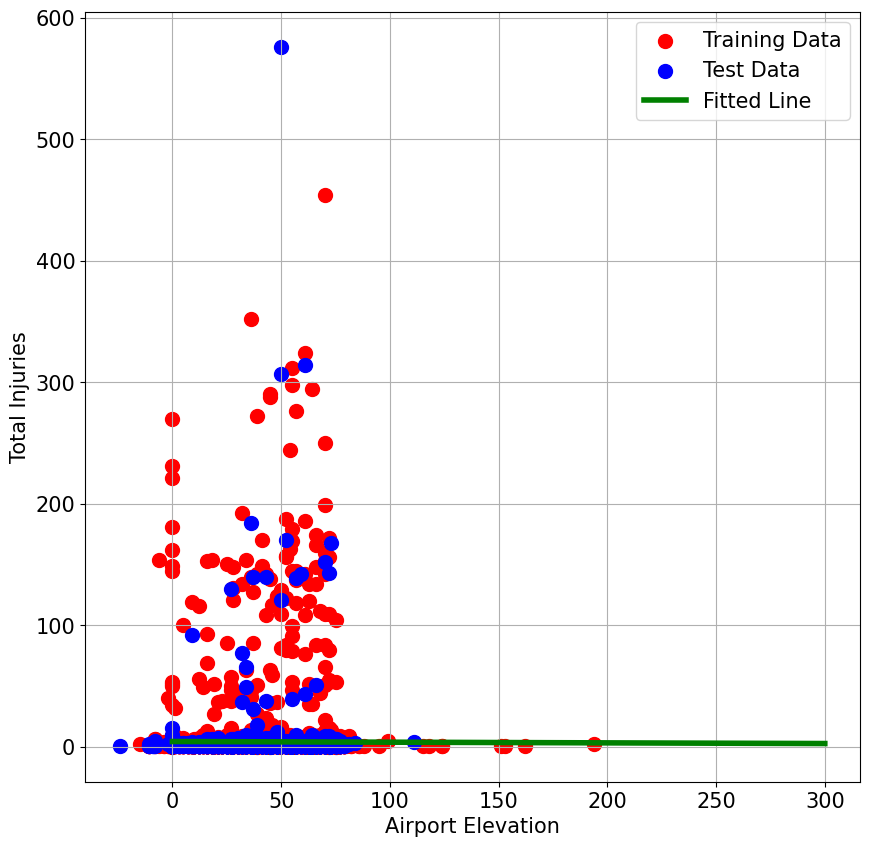

In [11]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
w0l=lin_reg.intercept_[0]  # w_0
w1l=lin_reg.coef_[0][0]    # W-1

y_pred_lr_train = lin_reg.predict(x_train)
y_pred_lr_test = lin_reg.predict(x_test)

# Model Evaluation
MAE_lr_test=mean_absolute_error(y_test, y_pred_lr_test)
MAE_lr_train=mean_absolute_error(y_train, y_pred_lr_train)
print(f'The value of mean absolute error (train) is: {MAE_lr_train:.2f}')
print(f'The value of mean absolute error (test) is: {MAE_lr_test:.2f}')

r2score_lr_test = r2_score(y_test, y_pred_lr_test)
r2score_lr_train = r2_score(y_train, y_pred_lr_train)
print(f'The value of R2 (train) is: {r2score_lr_train:.2f}')
print(f'The value of R2 (test) is: {r2score_lr_test:.2f}')

# Plotting results
plt.figure(figsize=(10,10))
plt.rc('font',size=15)

plt.scatter(x_train, y_train,s=100,color='red',label='Training Data')
plt.scatter(x_test, y_test,s=100,color='blue', label='Test Data')

xplot=np.linspace(0,300,num=100)
yplot=w0l+w1l*xplot
plt.plot(xplot, yplot, lw=4,color='green', label='Fitted Line')

plt.xlabel('Airport Elevation')
plt.ylabel('Total Injuries')
plt.grid(True)
plt.legend(loc='best')

The value of mean absolute error (train) is: 4.48
The value of mean absolute error (test) is: 4.12
The value of R2 (train) is: 0.00
The value of R2 (test) is: -0.00


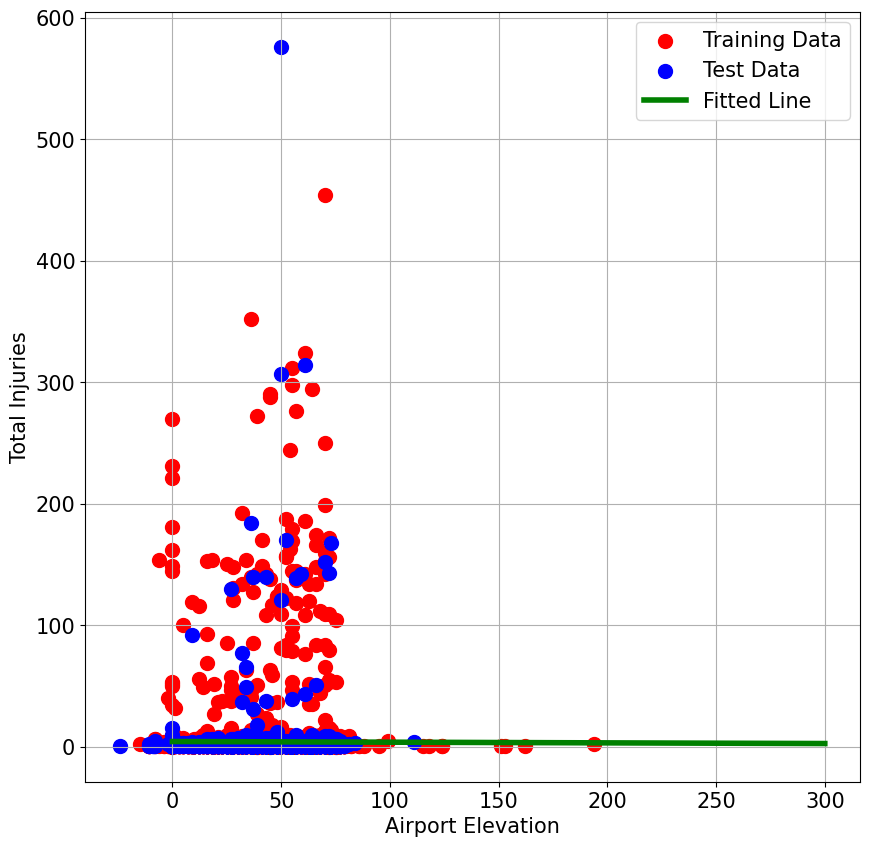

In [12]:
# Polynomial Regression
poly_tf = PolynomialFeatures(degree=2) # 2nd degree poly is lowest, I checked
x_train_transformed = poly_tf.fit_transform(x_train)
x_test_transformed = poly_tf.fit_transform(x_test)

poly_reg = LinearRegression()
poly_reg.fit(x_train_transformed, y_train)

y_pred_pr_test = poly_reg.predict(x_test_transformed)
y_pred_pr_train = poly_reg.predict(x_train_transformed)

# Model Evaluation
MAE_pr_test=mean_absolute_error(y_test, y_pred_pr_test)
MAE_pr_train=mean_absolute_error(y_train, y_pred_pr_train)
print(f'The value of mean absolute error (train) is: {MAE_pr_train:.2f}')
print(f'The value of mean absolute error (test) is: {MAE_pr_test:.2f}')

r2score_pr_test = r2_score(y_test, y_pred_pr_test)
r2score_pr_train = r2_score(y_train, y_pred_pr_train)
print(f'The value of R2 (train) is: {r2score_pr_train:.2f}')
print(f'The value of R2 (test) is: {r2score_pr_test:.2f}')

# Plotting results
plt.figure(figsize=(10,10))
plt.rc('font',size=15)

plt.scatter(x_train, y_train,s=100,color='red',label='Training Data')
plt.scatter(x_test, y_test,s=100,color='blue', label='Test Data')

xplot=np.linspace(0, 300, num=100)
yplotP = poly_reg.intercept_[0]+poly_reg.coef_[0][1]*xplot+poly_reg.coef_[0][2]*xplot**2
plt.plot(xplot, yplot, lw=4,color='green', label='Fitted Line')

plt.xlabel('Airport Elevation')
plt.ylabel('Total Injuries')
plt.grid(True)
plt.legend(loc='best')

In [13]:
# Multiple Linear Regression
factors = ['apt_elev', 'wx_temp', 'wx_dew_pt']
x_data_multi = np.array(sub_df1[factors])
y_data_multi = np.array(sub_df1[['inj_tot_t']])

x_train, x_test, y_train, y_test = train_test_split(x_data_multi,y_data_multi,test_size=0.2,shuffle=True, random_state=20)\

multi_reg = LinearRegression()
multi_reg.fit(x_train,y_train)

y_pred_mlr_test = multi_reg.predict(x_test)
y_pred_mlr_train =multi_reg.predict(x_train)

# Model Evaluation
MAE_mlr_test=mean_absolute_error(y_test, y_pred_mlr_test)
MAE_mlr_train=mean_absolute_error(y_train, y_pred_mlr_train)
print(f'The value of mean absolute error (train) is: {MAE_mlr_train:.2f}')
print(f'The value of mean absolute error (test) is: {MAE_mlr_test:.2f}')

r2score_mlr_test = r2_score(y_test, y_pred_mlr_test)
r2score_mlr_train = r2_score(y_train, y_pred_mlr_train)
print(f'The value of R2 (train) is: {r2score_mlr_train:.2f}')
print(f'The value of R2 (test) is: {r2score_mlr_test:.2f}')


The value of mean absolute error (train) is: 4.58
The value of mean absolute error (test) is: 4.46
The value of R2 (train) is: 0.01
The value of R2 (test) is: -0.00


In [14]:
# Ridge and Lasso Regressions
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)
rid_las_reg = LinearRegression()

# using same x_data and y_data from multiple linear regression
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)

# Ridge regression
y_pred_ridge_test = ridge.predict(x_test)   # using test data
y_pred_ridge_train = ridge.predict(x_train) # using training data

# Lasso regression
y_pred_lasso_test = lasso.predict(x_test)   # using test data
y_pred_lasso_train = lasso.predict(x_train) # using training data

# Model Evaluation
MAE_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)
MAE_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
print(f'The value of mean absolute error (ridge train) is: {MAE_ridge_train:.2f}')
print(f'The value of mean absolute error (ridge test) is: {MAE_ridge_test:.2f}')

r2score_ridge_test = r2_score(y_test, y_pred_ridge_test)
r2score_ridge_train = r2_score(y_train, y_pred_ridge_train)
print(f'The value of R2 (lasso train) is: {r2score_ridge_train:.2f}')
print(f'The value of R2 (lasso test) is: {r2score_ridge_test:.2f}')

MAE_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)
MAE_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
print(f'The value of mean absolute error (ridge train) is: {MAE_lasso_train:.2f}')
print(f'The value of mean absolute error (ridge test) is: {MAE_lasso_test:.2f}')

r2score_lasso_test = r2_score(y_test, y_pred_lasso_test)
r2score_lasso_train = r2_score(y_train, y_pred_lasso_train)
print(f'The value of R2 (lasso train) is: {r2score_lasso_train:.2f}')
print(f'The value of R2 (lasso test) is: {r2score_lasso_test:.2f}')


The value of mean absolute error (ridge train) is: 4.58
The value of mean absolute error (ridge test) is: 4.46
The value of R2 (lasso train) is: 0.01
The value of R2 (lasso test) is: -0.00
The value of mean absolute error (ridge train) is: 4.55
The value of mean absolute error (ridge test) is: 4.42
The value of R2 (lasso train) is: 0.01
The value of R2 (lasso test) is: -0.00


c:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)



For Gaussian function
The value of RSE for test data is: 1.00
The value of mean absolute error (test) is: 4.17
The value of RSE for training data is: 1.00
The value of mean absolute error (train) is: 4.51

For cosine function
The value of RSE for test data is: 1.03
The value of mean absolute error (test) is: 3.65
The value of RSE for training data is: 1.04
The value of mean absolute error (train) is: 4.02


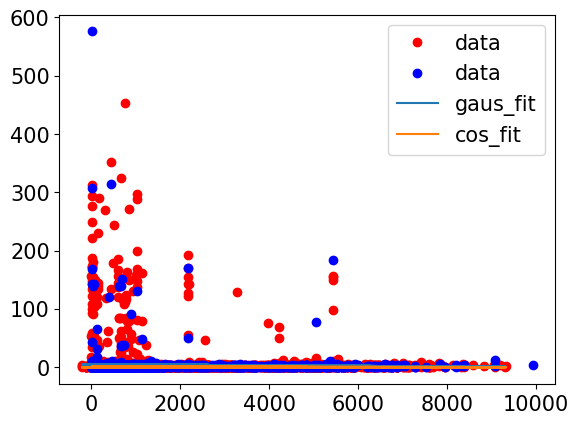

In [15]:
# Fitting to a curve
y_data = sub_df1['inj_tot_t']

x_data_elev = sub_df1['apt_elev']
x_data_temp = sub_df1['wx_temp']
x_data_dew = sub_df1['wx_dew_pt']

x_train, x_test, y_train, y_test = train_test_split(x_data_elev, y_data, test_size=0.2, random_state=125)
# x_train, x_test, y_train, y_test = train_test_split(x_data_temp, y_data, test_size=0.2, random_state=125)
# x_train, x_test, y_train, y_test = train_test_split(x_data_dew, y_data, test_size=0.2, random_state=125)

def cos_func(x, D, E):
    y = D*np.cos(E*x)
    return y

parameters, covariance = curve_fit(cos_func, x_train, y_train)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(x_train, fit_D, fit_E)

def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

parameters, covariance = curve_fit(Gauss, x_train, y_train)
fit_A = parameters[0]
fit_B = parameters[1]

fit_y = Gauss(x_train, fit_A, fit_B)

fig = plt.figure()   
plt.plot(x_train, y_train, 'o', label='data', color = 'red')
plt.plot(x_test, y_test, 'o', label='data', color = 'blue')
plt.plot(x_train, fit_y, '-', label='gaus_fit')
plt.plot(x_train, fit_cosine, '-', label='cos_fit')
plt.legend()

# Model Evaluation
y_predict_gauss_tr = Gauss(x_train, fit_A, fit_B)
y_predict_cos_tr = cos_func(x_train, fit_D, fit_E)
y_predict_gauss_ts = Gauss(x_test, fit_A, fit_B)
y_predict_cos_ts = cos_func(x_test, fit_D, fit_E)

print("\nFor Gaussian function")
## Evaluation using test data
rse2ndp_test_lso = 1-r2_score(y_test, y_predict_gauss_ts)
print('The value of RSE for test data is: %.2f' %rse2ndp_test_lso)
MAE=mean_absolute_error(y_test, y_predict_gauss_ts)
print(f'The value of mean absolute error (test) is: {MAE:.2f}')
# Evaluation using train data
rse2ndp_train_lso = 1-r2_score(y_train, y_predict_gauss_tr)
print('The value of RSE for training data is: %.2f' %rse2ndp_train_lso)
MAE=mean_absolute_error(y_train, y_predict_gauss_tr)
print(f'The value of mean absolute error (train) is: {MAE:.2f}')

print("\nFor cosine function")
## Evaluation using test data
rse2ndp_test_lso = 1-r2_score(y_test, y_predict_cos_ts)
print('The value of RSE for test data is: %.2f' %rse2ndp_test_lso)
MAE=mean_absolute_error(y_test, y_predict_cos_ts)
print(f'The value of mean absolute error (test) is: {MAE:.2f}')
# Evaluation using train data
rse2ndp_train_lso = 1-r2_score(y_train, y_predict_cos_tr)
print('The value of RSE for training data is: %.2f' %rse2ndp_train_lso)
MAE=mean_absolute_error(y_train, y_predict_cos_tr)
print(f'The value of mean absolute error (train) is: {MAE:.2f}')

<b>Discussing results of linear regression</b>

As stated previously, the errors for these regressions are atrocious. However, when considering the distribution of the data, having a model predict injuries within less than 25% of the standard deviation is not so bad. It is still a bad model, so I will now change my approach.

<h1 style="font-size:30px;"> Thinking about classification </h1>

Another way to analyze the data would be to see if we could categorize how lethal a particular incident was. The injury levels are rated from 'NONE' to 'FATAL', so doing a KNN multiclass model is applicable. I will use <i>ev_year, apt_dist, wx_temp, wx_dew_pt, wind_vel_kts</i>, and <i>altimeter</i> to make predictions.

accuracy score for training data is 0.614 and accuracy score for test data is 0.551
Jaccard score for training:  0.44343065693430656
Jaccard score for test:  0.38050394502417917
F-Score for training:  0.6144121365360303
F-Score for test:  0.5512536873156342


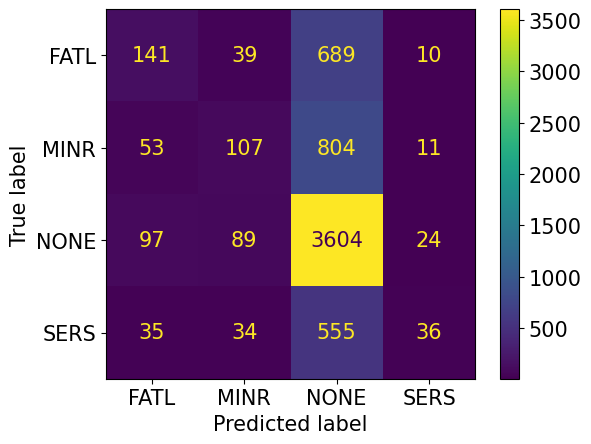

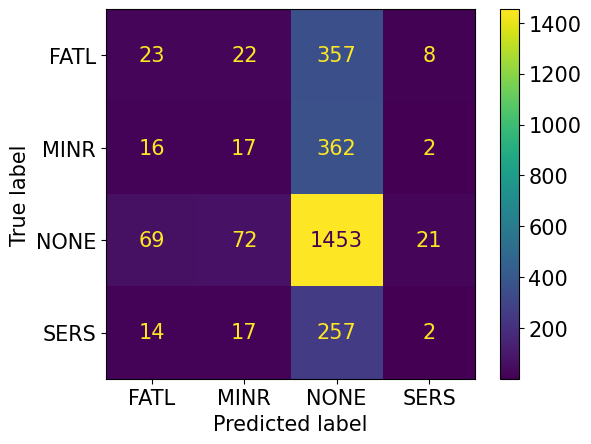

In [16]:
# KNN classification model
factors = ['ev_year', 'apt_dist', 'wx_temp', 'wx_dew_pt', 'wind_vel_kts', 'altimeter']

x_data_knn = np.array(sub_df1[factors])
y_data_knn = sub_df1['ev_highest_injury']

MinMaxscaler = MinMaxScaler()  # define min max scaler object
x_data_scaled = MinMaxscaler.fit_transform(x_data_knn)  # transform data

x_train,x_test,y_train,y_test = train_test_split(x_data_scaled, y_data_knn, test_size=0.3)

neighbor_class = KNeighborsClassifier(n_neighbors = 9, metric='euclidean') # nine chosen based on code below
neighbor_class.fit(x_train,y_train)

y_class_test = neighbor_class.predict(x_test)
y_class_train= neighbor_class.predict(x_train)

acc_scoreTrain = accuracy_score(y_train,y_class_train)
acc_scoreTest = accuracy_score(y_test,y_class_test)
print(f'accuracy score for training data is {acc_scoreTrain:0.3f} and accuracy score for test data is {acc_scoreTest:0.3f}')

J_scoreTrainM = jaccard_score(y_train,y_class_train, average='micro')
J_scoreTestM = jaccard_score(y_test,y_class_test, average='micro')
print("Jaccard score for training: ", J_scoreTrainM,)
print("Jaccard score for test: ", J_scoreTestM)

F_scoreTrainM = f1_score(y_train,y_class_train, average='micro')
F_scoreTestM = f1_score(y_test,y_class_test, average='micro')
print("F-Score for training: ", F_scoreTrainM)
print("F-Score for test: ", F_scoreTestM)

CM_scoreTrainM = confusion_matrix(y_train, y_class_train)
CM_scoreTestM = confusion_matrix(y_test,y_class_test)

dispTrM=ConfusionMatrixDisplay(CM_scoreTrainM, display_labels=neighbor_class.classes_)
dispTrM.plot()
dispTsM=ConfusionMatrixDisplay(CM_scoreTestM, display_labels=neighbor_class.classes_)
dispTsM.plot()

Text(0, 0.5, 'Accuracy')

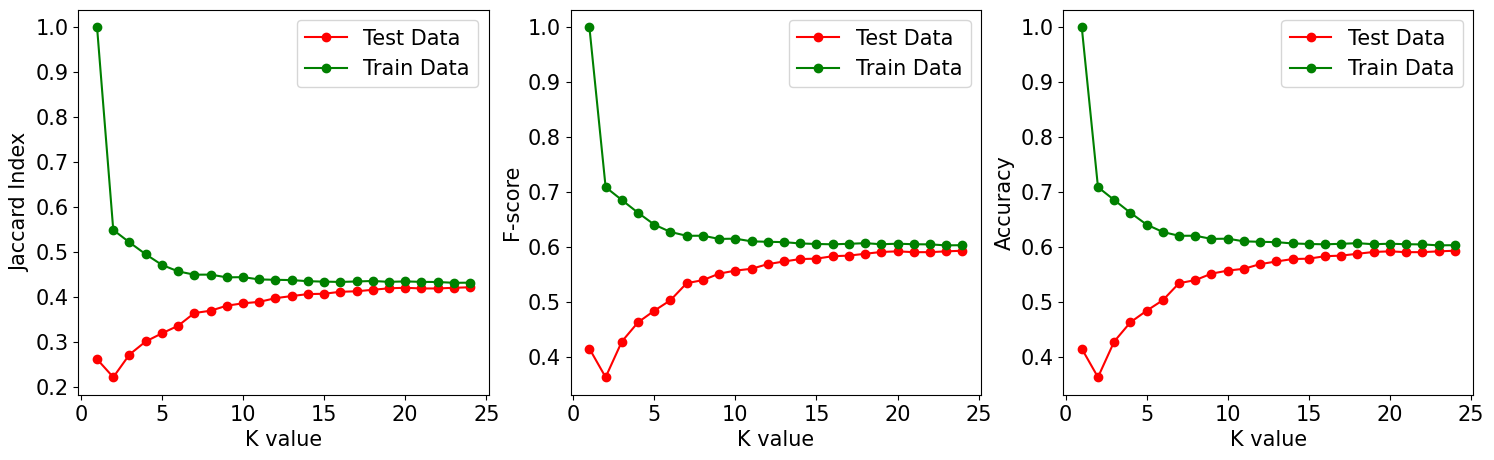

In [17]:
# Finding ideal K-value
Ks = 25

acc_looptest = np.zeros((Ks-1))
acc_looptrain = np.zeros((Ks-1))

Jacc_TestM = np.zeros((Ks-1))
Jacc_TrainM= np.zeros((Ks-1))

F_Loop_TestM = np.zeros((Ks-1))
F_Loop_TrainM= np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neighLoopM = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhatTestLoopM  = neighLoopM.predict(x_test)
    yhatTrainLoopM = neighLoopM.predict(x_train)

    Jacc_TestM[n-1] = jaccard_score(y_test, yhatTestLoopM, average='micro')
    Jacc_TrainM[n-1] = jaccard_score(y_train, yhatTrainLoopM, average='micro')

    F_Loop_TestM[n-1] = f1_score(y_test, yhatTestLoopM, average='micro')
    F_Loop_TrainM[n-1] = f1_score(y_train, yhatTrainLoopM, average='micro')

    acc_looptest[n-1] = accuracy_score(y_test, yhatTestLoopM)
    acc_looptrain[n-1] = accuracy_score(y_train, yhatTrainLoopM)

import matplotlib.pyplot as plt

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.plot(range(1,Ks),Jacc_TestM,'r-o',range(1,Ks),Jacc_TrainM,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('Jaccard Index')

plt.subplot(1,3,2)
plt.plot(range(1,Ks),F_Loop_TestM,'r-o',range(1,Ks),F_Loop_TrainM,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('F-score')

plt.subplot(1,3,3)
plt.plot(range(1,Ks),acc_looptest,'r-o',range(1,Ks),acc_looptrain,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('Accuracy')